# K Nearest neighbors


## K-Nearest neighbor on Terrain Data
A continuation of [previous](https://denispastory.com/wp-content/uploads/2018/01/IntroductiontoML.html) work.

This one is a more detailed where Terrain Data is created. For training and testing 
 

### Lets start by creating data set

In [1]:
#!/usr/bin/python
import random
import pandas as pd

#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test



### The visualizations of the data
This function will help up visualize the dataset

In [2]:
#!/usr/bin/python

#from udacityplots import *
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
%matplotlib inline 

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    plt.show()

### Using sklearn models, creat a classifier function

In [3]:
def classify(features_train, labels_train):
    ### import the sklearn module for KNeighborsRegressor
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    from sklearn.neighbors import KNeighborsRegressor
    neigh = KNeighborsClassifier()
    return neigh.fit(features_train,labels_train)

In [4]:
import sys
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################
### we handle the import statement and SVC creation for you here
def classify_KNN(features_train, labels_train):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    knn = KNeighborsClassifier(n_neighbors=1)
    
    fit_ = knn.fit(features_train,labels_train)
    pred = knn.predict(features_test)
    accuracy = accuracy_score(pred, labels_test)
    
    print "The model accuracy is:",(accuracy*100),"%"
    return fit_


### Applying the above functions

The model accuracy is: 94.0 %


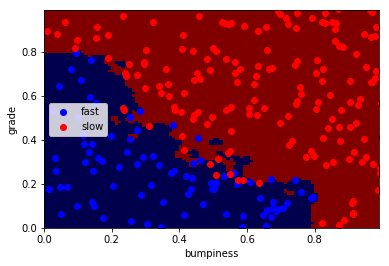

In [5]:
#Instantiate the classifier
clf = classify_KNN(features_train, labels_train)
### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)

## Calculating NB Accuracy

In [6]:
def KNNccuracy(features_train, labels_train, features_test, labels_test):
    """ compute the accuracy of your 
        KNN classifier 
        """
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    
    ### create classifier
    neigh = KNeighborsClassifier(n_neighbors=1)#TODO

    ### fit the classifier on the training features and labels
    fit = neigh.fit(features_train,labels_train)
    
    ### use the trained classifier to predict labels for the test features
    pred = neigh.predict(features_test)

    accuracy = accuracy_score(pred, labels_test)
    print "The model accuracy is:",(accuracy*100),"%"
    


In [7]:
KNNccuracy(features_train, labels_train, features_test, labels_test)

The model accuracy is: 94.0 %
